In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string
import time

In [ ]:
complaints = pd.read_csv('complaints.csv')

In [ ]:
complaints = complaints.rename(columns = {'Consumer complaint narrative': 'complaints_narrative',
                                         'Issue': 'complaints_issue'})

In [ ]:
complaints

In [ ]:
#remove X's
complaints['complaints_narrative'] = complaints['complaints_narrative'].str.replace(r'[xX][xX]+',"", regex = True)

In [ ]:
#remove numbers
complaints['complaints_narrative'] = complaints['complaints_narrative'].str.replace('\d+', '', regex=True)

In [ ]:
complaints['complaint_length'] = complaints['complaints_narrative'].apply(len)

In [ ]:
#Asha's code to remove stop words and punctuation
stopwords_list = stopwords.words('english') + list(string.punctuation)

def tokenize_and_remove_stopwords(dataframe, column_name):
    stopwords_list = stopwords.words('english') + list(string.punctuation) 

    tokenized_data = []
    for row in dataframe[column_name]:
        tokens = nltk.word_tokenize(row.lower())
        filtered_tokens = [token.lemma_.strip() for token in tokens if token not in stopwords_list]
        tokenized_data.append(filtered_tokens)

    return tokenized_data

complaints['issues_tokenized'] = tokenize_and_remove_stopwords(complaints, 'complaints_narrative')

In [ ]:
complaints

In [ ]:
#add lemmatization to Asha's code using nltk
from nltk.stem import WordNetLemmatizer


def tokenize_and_lemmatize(dataframe, column_name):
    stopwords_list = stopwords.words('english') + list(string.punctuation)
    lemmatizer = WordNetLemmatizer()
    tokenized_data = []
    
    for row in dataframe[column_name]:
        tokens = nltk.word_tokenize(row.lower())
        filtered_tokens = [lemmatizer.lemmatize(token.strip()) for token in tokens if token not in stopwords_list]
        tokenized_data.append(filtered_tokens)

    return tokenized_data

In [ ]:
#Using Spacy to tokenize and lemmatize
#or Using Spacy
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Using Spacy to tokenize and lemmatize
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop
             and not token.is_digit
             and not token.is_punct
             and not token.is_space]
    return ' '.join(tokens)

In [ ]:
#this took more than 30 minutes and never finished
complaints['clean_narrative'] = complaints['complaints_narrative'].apply(preprocess_text)

In [ ]:
#attempt #3 Using Spacy nlp to tokenize and lemmatize

In [ ]:
# Lemmatization with stopwords removal
complaints['lemmatized']=complaints['complaints_narrative'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
# Load spaCy pipeline
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# Process large text as a stream via `nlp.pipe()` and iterate over the results, extracting lemmas
lemma_text_list = []
for doc in nlp.pipe(complaints['complaints_narrative']):
    lemma_text_list.append(" ".join(token.lemma_ for token in doc if not token.is_stop))
complaints["text_lemma"] = lemma_text_list

In [ ]:
# Use mapping to convert columns to numerical values
issue_mapping = {'Attempts to collect debt not owed': 1, 
                 'Communication tactics': 2, 
                 'Fraud or scam': 3, 
                 'Incorrect information on your report': 4,
                 'Struggling to pay mortgage': 5}

# replace the issue values with numerical values

complaints['issue'] = complaints['issue'].replace(issue_mapping)

### Tim's pickle file

In [ ]:
complaints_tim = pd.read_pickle('complaints_nlp.pkl')

In [ ]:
complaints_tim

# complaints_proc

In [43]:
complaints_proc = pd.read_csv('complaints_proc.csv')

In [60]:
complaints_proc

,complaints_narrative,complaints_issue,complaint_length,clean_narrative
0,My name is this complaint is not made in err...,3,679,complaint error party declare penalty perjury ...
1,I searched on for and was pointed to a web...,2,1890,search point website legitimately believe webs...
2,I have a particular account that is stating th...,3,294,particular account state owe $ . list credit r...
3,I have not supplied proof under the doctrine o...,0,3396,supply proof doctrine estoppel silence engelha...
4,Hello i'm writing regarding account on my cred...,3,860,hello write account credit report belong open ...
...,...,...,...,...
353427,Collections account I have no knowledge of,0,42,collection account knowledge
353428,"Dear CFPB Team, The reason for my complaint is...",0,4290,dear cfpb team reason complaint try resolve ac...
353429,FRCA violations : Failing to Follow Debt Dispu...,0,4248,frca violation fail follow debt dispute proced...
353430,"My Father, a acquired an HECM reverse mortg...",4,5206,father acquire hecm reverse mortgage property ...


In [45]:
complaints_proc_b = pd.read_csv('complaints_procb.csv')

In [46]:
complaints_proc_b

,complaints_narrative,complaints_issue,clean_narrative
0,My name is this complaint is not made in err...,Incorrect information on your report,"['complaint', 'error', 'party', 'declare', 'pe..."
1,I searched on for and was pointed to a web...,Fraud or scam,"['search', 'point', 'website', 'legitimately',..."
2,I have a particular account that is stating th...,Incorrect information on your report,"['particular', 'account', 'state', 'owe', '$',..."
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed,"['supply', 'proof', 'doctrine', 'estoppel', 's..."
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report,"['hello', 'write', 'account', 'credit', 'repor..."
...,...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed,"['collection', 'account', 'knowledge']"
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed,"['dear', 'cfpb', 'team', 'reason', 'complaint'..."
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed,"['frca', 'violation', 'fail', 'follow', 'debt'..."
353430,"My Father, a acquired an HECM reverse mortg...",Struggling to pay mortgage,"['father', 'acquire', 'hecm', 'reverse', 'mort..."


In [44]:
# remove double x-s or more
complaints_proc['clean_narrative'] = complaints_proc['clean_narrative'].str.replace(r'[xX][xX]+','', regex=True)

# remove double __ or more
complaints_proc['clean_narrative'] = complaints_proc['clean_narrative'].str.replace(r'__+','', regex=True)

# stripping all numeric values from complaints
complaints_proc['clean_narrative'] = complaints_proc['clean_narrative'].str.replace('\d+', '', regex=True)

In [48]:
# Use mapping to convert columns to numerical values
issue_mapping = {'Attempts to collect debt not owed': 0, 
                 'Communication tactics': 1, 
                 'Fraud or scam': 2, 
                 'Incorrect information on your report': 3,
                 'Struggling to pay mortgage': 4}

# replace the issue values with numerical values

complaints_proc['complaints_issue'] = complaints_proc['complaints_issue'].replace(issue_mapping)

In [47]:
# Use mapping to convert columns to numerical values
issue_mapping = {'Attempts to collect debt not owed': 0, 
                 'Communication tactics': 1, 
                 'Fraud or scam': 2, 
                 'Incorrect information on your report': 3,
                 'Struggling to pay mortgage': 4}

# replace the issue values with numerical values

complaints_proc_b['complaints_issue'] = complaints_proc_b['complaints_issue'].replace(issue_mapping)

In [49]:
complaints_proc_b['complaints_issue'].unique()

array([3, 2, 0, 1, 4], dtype=int64)

In [ ]:
#complaints_proc['complaints_issue'] = complaints_proc['complaints_issue'] - 1

In [50]:
X = complaints_proc[['clean_narrative']].fillna('')
y = complaints_proc['complaints_issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vect = CountVectorizer()

X_train_vec = vect.fit_transform(X_train['clean_narrative'])
X_test_vec = vect.transform(X_test['clean_narrative'])

In [53]:
len(vect.vocabulary_)

57646

In [54]:
vect.vocabulary_['great']

22726

In [55]:
#59
X_train_vec.sum(axis=0).tolist()[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 90,
 18,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 8,
 2,
 5,
 1,
 1,
 2,
 11,
 1,
 1,
 1,
 10,
 1,
 7,
 80,
 1,
 1,
 1,
 10,
 1,
 3,
 2,
 1,
 5,
 1,
 2,
 12,
 1,
 9,
 1,
 6,
 1,
 9,
 237,
 1,
 1,
 1,
 8,
 2,
 1,
 1,
 1,
 169,
 26,
 21,
 1,
 1,
 1,
 326,
 1,
 13,
 90,
 1,
 1,
 9,
 37,
 1,
 1,
 1,
 27,
 1,
 28,
 43,
 1,
 43,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 4,
 73,
 14,
 6,
 3,
 1,
 28,
 3,
 1,
 1447,
 3,
 1,
 2,
 4,
 1,
 5857,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 4,
 1,
 1,
 4,
 19208,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 5,
 2,
 3,
 12,
 3,
 1,
 2,
 1,
 23,
 9,
 2,
 5,
 2,
 1,
 55,
 2,
 1,
 1,
 2,
 17,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 11,
 3,
 3,
 2,
 1,
 49,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 38,
 1,
 44,
 6,
 1,
 1,
 1,
 1,
 2,
 39,
 5,
 1,
 1,
 9,
 42,
 1,
 13,
 24,
 2,
 1,
 4,
 85,
 73,
 4,
 1,
 1,
 34,
 161,
 1,
 1,
 7,
 2,
 1,
 12,
 1,
 555,
 1,
 406,
 5,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 747,
 1,
 2730,
 3,
 2,
 1

In [56]:
#60
# Fill this in to build a DataFrame of words and their counts
word_counts = pd.DataFrame({
    'words': vect.get_feature_names_out(),
    'frequency': X_train_vec.sum(axis=0).tolist()[0]
})

word_counts.head()

,words,frequency
0,__,1
1,___signed_identity,1
2,_c,1
3,_cfpb_consent,1
4,_cfpb_debt,1


In [57]:
#61
word_counts.sort_values('frequency', ascending = False)

,words,frequency
12351,credit,556255
42712,report,509970
485,account,507782
26516,information,290530
13335,debt,182292
...,...,...
26828,inomplete,1
26827,inofrme,1
26824,inofmation,1
26822,inocense,1


In [63]:
from gensim import corpora, models

texts = [str(tokens).split() for tokens in complaints_proc.clean_narrative]
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

In [64]:
print(id2word.doc2bow(texts[139])) # Equivalent to corpus


[(2, 1), (3, 2), (19, 2), (22, 1), (25, 1), (26, 1), (38, 5), (57, 1), (78, 1), (85, 1), (87, 3), (89, 1), (105, 1), (112, 3), (128, 5), (139, 1), (144, 1), (168, 1), (231, 1), (240, 1), (264, 2), (277, 1), (289, 1), (299, 1), (323, 1), (338, 4), (354, 1), (383, 1), (386, 1), (417, 1), (419, 4), (424, 1), (561, 1), (813, 1), (814, 1), (844, 1), (1011, 1), (1099, 3), (1155, 1), (1463, 1), (1566, 1), (1567, 1), (1568, 2), (1569, 1)]


In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [75]:
def ldaCV(n_topics, corpus, id2word, test_size=0.2, sample=None):
    if not isinstance(n_topics, list):
        n_topics = [n_topics]
    obs = len(corpus)
    corpus = np.array(corpus) # draws from corpus created above
    
    if sample is not None:
        if sample < 1:
            sample_idx = random.sample(range(obs), int(obs*sample)) # inital pass assigns each sample to a random
        else:
            sample_idx = random.sample(range(obs), int(sample))
        corpus = corpus[sample_idx]
    
    train, test = train_test_split(corpus, test_size=test_size) # cross validated
    perplexities = []
    
    for n in n_topics:
        print('{} topics'.format(n))
        model = models.ldamodel.LdaModel(train, num_topics=n, id2word=id2word)
        perplexity = model.log_perplexity(test)       
        print(' - Perplexity: {}'.format(round(perplexity, 3)))
        perplexities.append((n, perplexity))
    
    return perplexities    

In [76]:
%time p = ldaCV(list(range(50,450,50)),corpus,id2word)


C:\Users\16156\AppData\Local\Temp\ipykernel_2216\3761667333.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corpus = np.array(corpus) # draws from corpus created above


50 topics
 - Perplexity: -7.642
100 topics


KeyboardInterrupt: 

In [91]:
%%time
modelb = models.ldamodel.LdaModel(corpus, num_topics=5, 
                                 id2word=id2word, 
                                 passes = 20, 
                                 chunksize=2000, 
                                 alpha='auto',
                                 eta='auto',
                                 eval_every = None)

CPU times: total: 1h 37min 40s
Wall time: 1h 21min 23s


In [92]:
modelb.save('complaints_full_ldab.model')


In [93]:
modelb.print_topics(num_topics = 5)


[(0,
  '0.046*"loan" + 0.041*"payment" + 0.026*"mortgage" + 0.014*"home" + 0.014*"modification" + 0.011*"month" + 0.009*"document" + 0.009*"pay" + 0.009*"time" + 0.008*"foreclosure"'),
 (1,
  '0.073*"debt" + 0.025*"collection" + 0.015*"company" + 0.013*"provide" + 0.011*"owe" + 0.010*"letter" + 0.010*"collect" + 0.010*"request" + 0.010*"state" + 0.009*"send"'),
 (2,
  '0.061*"credit" + 0.040*"information" + 0.039*"report" + 0.026*"account" + 0.019*"reporting" + 0.019*"request" + 0.019*"item" + 0.015*"law" + 0.015*"delete" + 0.015*"provide"'),
 (3,
  '0.050*"identity" + 0.047*"theft" + 0.037*"inquiry" + 0.033*"report" + 0.030*"fraudulent" + 0.028*"account" + 0.028*"remove" + 0.026*"file" + 0.025*"credit" + 0.022*"item"'),
 (4,
  '0.038*"claim" + 0.022*"s" + 0.020*"reporting" + 0.016*"compliance" + 0.016*"collection" + 0.011*"compliant" + 0.011*"plaintiff" + 0.010*"complaint" + 0.010*"document" + 0.010*"practice"'),
 (5,
  '0.079*"consumer" + 0.058*"information" + 0.029*"report" + 0.026*

In [89]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [94]:
complaints_visb = gensimvis.prepare(modelb, corpus, id2word)
#pyLDAvis.display(complaints_visb)
pyLDAvis.save_html(complaints_visb, 'complaints_ldab.html')

In [ ]:
#5/16--xg boost

# XG BOOST

In [ ]:
#pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
%%time
xg_clas = xgb.XGBClassifier(colsample_bytree=0.3, learning_rate= 0.05, max_depth= 6, n_estimators= 500)
xg_clas.fit(X_train_vec, y_train)
y_pred_xg = xg_clas.predict(X_test_vec)

In [ ]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Accuracy:',accuracy_score(y_test, y_pred_xg))
print('F1 Score unweighted', f1_score(y_test, y_pred_xg, average = 'macro')) #unweighted for each class
print('F1 Score  weighted', f1_score(y_test, y_pred_xg, average = 'weighted')) #accounts for class imbalance

print(pd.crosstab(y_test, y_pred_xg, rownames = ['Actual'], colnames = ['Predicted']))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_xg))
print(classification_report(y_test,y_pred_xg))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test,y_pred_xg, labels = xg_clas.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xg_clas.classes_)
disp.plot()
plt.show()

In [ ]:
#5/18 -- word cloud

In [ ]:
#pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
text = complaints_proc['clean_narrative']
wordcloud = WordCloud().generate(' '.join(str(text)))

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
word_frequencies =dict(zip(vect.get_feature_names_out(),X_train_vec.sum(axis=0).tolist()[0]))
word_frequencies

{'__': 1,
 '___signed_identity': 1,
 '_c': 1,
 '_cfpb_consent': 1,
 '_cfpb_debt': 1,
 '_cfpb_supervisory': 1,
 '_ex': 1,
 '_in_': 7,
 '_more': 1,
 '_tickets': 1,
 'aa': 90,
 'aaa': 18,
 'aaaaan': 1,
 'aaac': 2,
 'aaacs': 1,
 'aaadvantage': 1,
 'aaaf': 2,
 'aaargon': 1,
 'aabout': 4,
 'aac': 8,
 'aaccorde': 2,
 'aaccount': 5,
 'aacnt': 1,
 'aacordance': 1,
 'aacorde': 2,
 'aacount': 11,
 'aact': 1,
 'aad': 1,
 'aaddress': 1,
 'aadvantage': 10,
 'aaes': 1,
 'aafe': 7,
 'aafes': 80,
 'aaffect': 1,
 'aafirm': 1,
 'aafraid': 1,
 'aag': 10,
 'aah': 1,
 'aai': 3,
 'aain': 2,
 'aaliant': 1,
 'aall': 5,
 'aalready': 1,
 'aamount': 2,
 'aams': 12,
 'aan': 1,
 'aand': 9,
 'aaociates': 1,
 'aap': 6,
 'aapply': 1,
 'aaragon': 9,
 'aargon': 237,
 'aarogon': 1,
 'aaron': 1,
 'aarp': 1,
 'aas': 8,
 'aassociate': 2,
 'aau': 1,
 'aauthorized': 1,
 'aavantage': 1,
 'ab': 169,
 'aba': 26,
 'aback': 21,
 'abaiding': 1,
 'abailable': 1,
 'abandoment': 1,
 'abandon': 326,
 'abandonde': 1,
 'abandoned': 13,
 

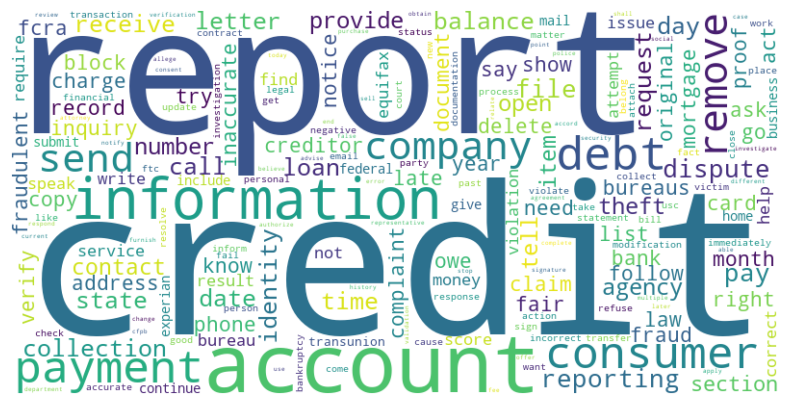

In [59]:
wordcloudb = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudb, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
from nltk.collocations import BigramCollocationFinder
from nltk import word_tokenize

In [ ]:
def compute_bigrams(input_df:pd.DataFrame, text_col: str) -> dict:
    """ Calculate the number of occurences that a pair of words appear next to
    each other, and return a dictionary of pair of words - count.
    """
    combined_text = ' '.join([str(x) for x in input_df[text_col] if x != ' '])

    finder = BigramCollocationFinder.from_words(word_tokenize(combined_text))

    bigrams_dict = {}
    for k, v in finder.ngram_fd.items():
        if len(k[0]) > 1 and len(k[1]) > 1:
            bigrams_dict[k] = v
        else:
            continue
    return bigrams_dict

In [ ]:
def plot_bigrams(input_df:pd.DataFrame, text_col: str, top_n: int, figsize=(10, 8)) -> None:
    
    bigrams_dict = compute_bigrams(input_df=input_df, text_col=text_col)
    bigrams_sorted = sorted(bigrams_dict.items(), key=lambda x: x[1], reverse=True)[0:top_n]
    bgram, counts = list(zip(*bigrams_sorted))
    bgstring = list(map(lambda txt: '-'.join(txt), bgram))
    counts = list(counts)

    plt.figure(figsize=figsize)
    g = sns.barplot(bgstring, counts, palette='muted')
    g.set_xticklabels(g.get_xticklabels(), rotation=80)
    plt.title(f'Top-{top_n} pairs of words that appear next to each other', fontweight='bold')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.1, color='black')
    plt.show()  

In [ ]:
%%time
plot_bigrams(input_df=complaints_proc, text_col='clean_narrative', top_n=15)